## 使用python进行最小二乘法二阶RC参数辨识
## 对象：电池HPPC工况数据每5%一次脉冲

In [1]:
from paras_id import *

In [2]:
df =pd.read_excel('HPPC每5%SOC-LFP_宁德LFP 1C HPPC #2_M01Ch08(008).xlsx')

In [3]:
k=0
index=[]
for i in range(len(df.index)-1):
    if (df['工步序号'].values[i] == 14) & (df['工步序号'].values[i+1] == 15):
        index.append(i+1)
        k=k+1

In [4]:
results = {'R0':[],
           'R1':[],
          'R2':[],
          'C1':[],
          'C2':[]}

In [5]:
df1 = df[df['工步序号'] == 5]
df2 = df[df['工步序号'] == 6]

### 电池OCV数据U0，需要单独实验测量

In [6]:
U0 = [3.3777,3.3367,3.3354,3.3342,3.3299,3.3038,3.2986,3.2962,3.2948,3.2939,3.2932,3.2924,3.2887,3.2732,3.2603,3.2474,3.2291,3.2085,3.2024,3.079,2.6041]

In [7]:
U1 = df1['电压(V)'].values[0]
U2 = df1['电压(V)'].values[1]
U3 = df2['电压(V)'].values[0]
U4 = df2['电压(V)'].values[1]
R0 = ((U1 - U2)+(U4 - U3))/2/100

V1 = df1['电压(V)'].values
V2 = df2['电压(V)'].values[0:100]
X_data = []
for i in range(len(V1)):
    X_data.append(i)

### 首先辨识100%的数据，后面使用循环辨识其余19个

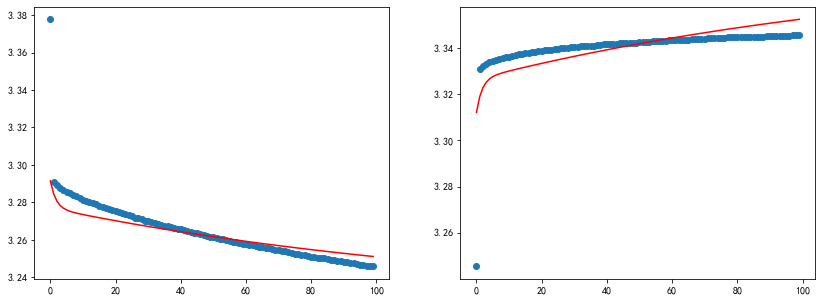

In [8]:
para_fit = Para_id(Uoc = U0[0], I = 100, R0 = R0)
params = para_fit.create_params()
t = np.array(X_data)
out = para_fit.fit(params, t, V1, V2)
para_fit.fit_plot(out, X_data, V1, V2)

In [9]:
results['R0'].append(R0)
results['R1'].append(out.params['R1'].value)
results['R2'].append(out.params['R2'].value)
results['C1'].append(out.params['tao1'].value/out.params['R1'].value)
results['C2'].append(out.params['tao2'].value/out.params['R2'].value)

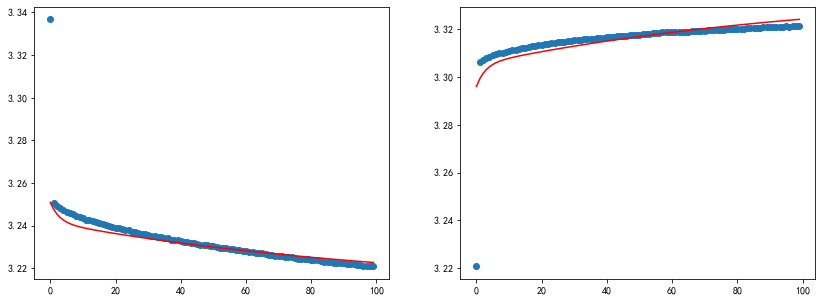

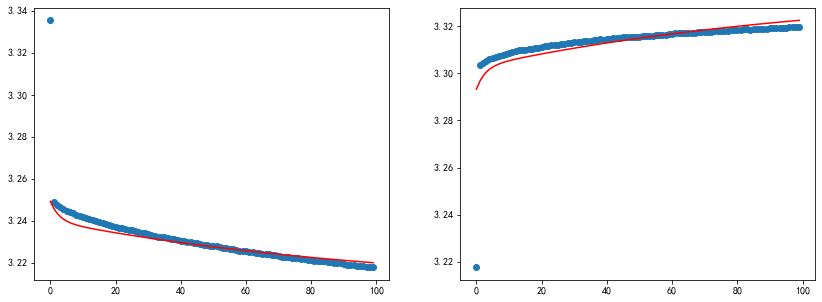

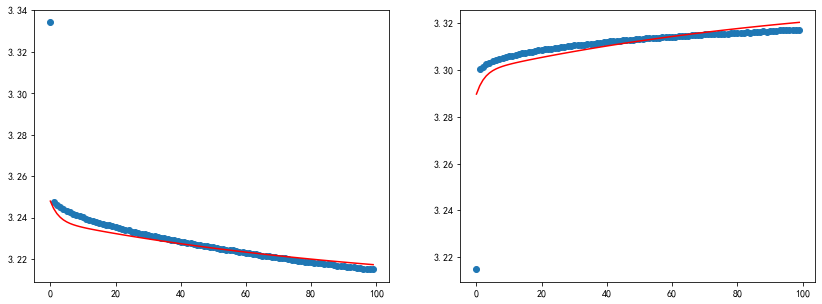

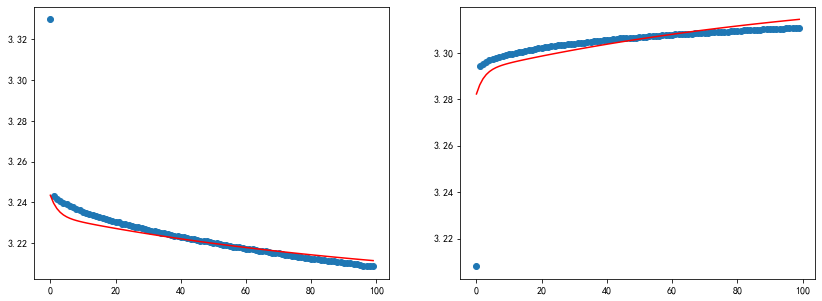

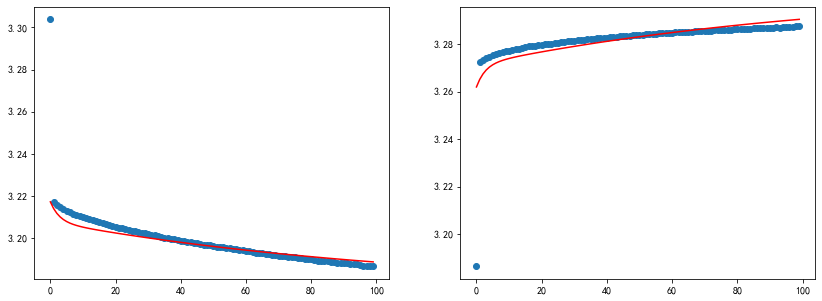

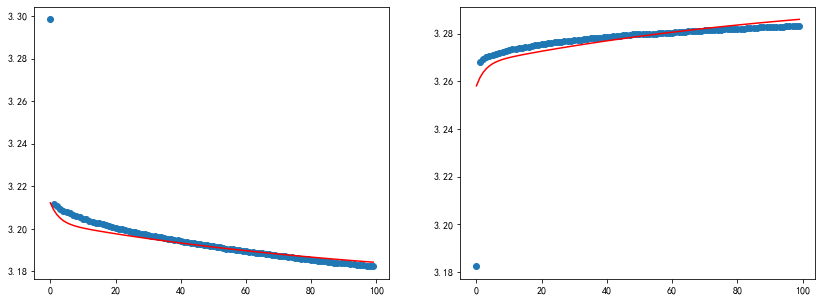

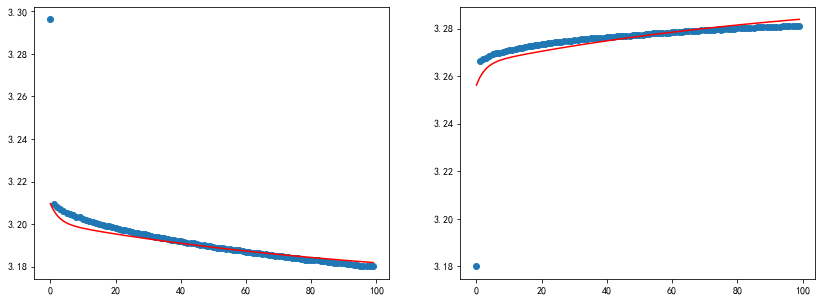

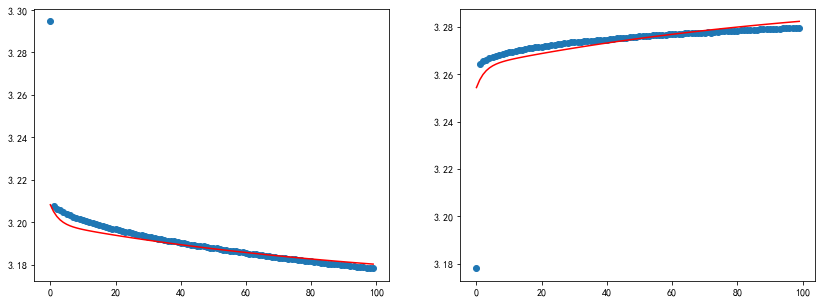

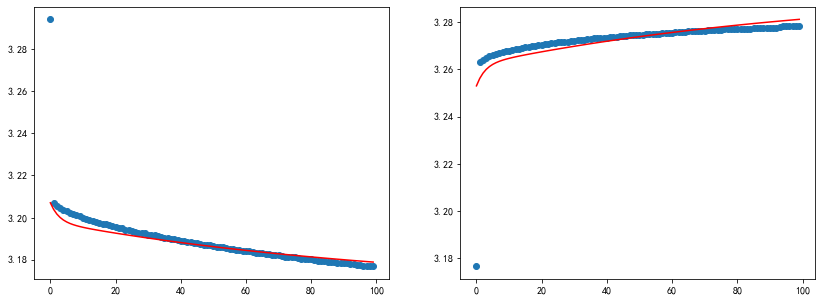

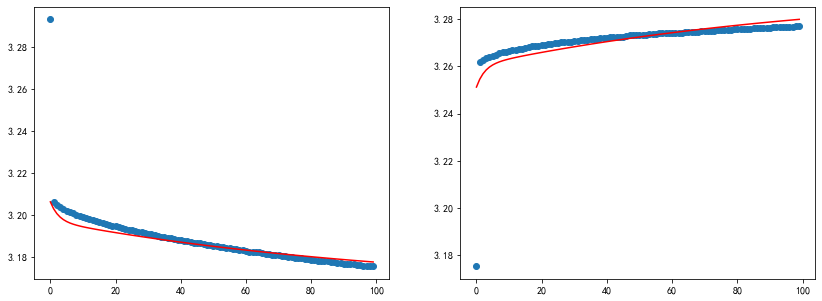

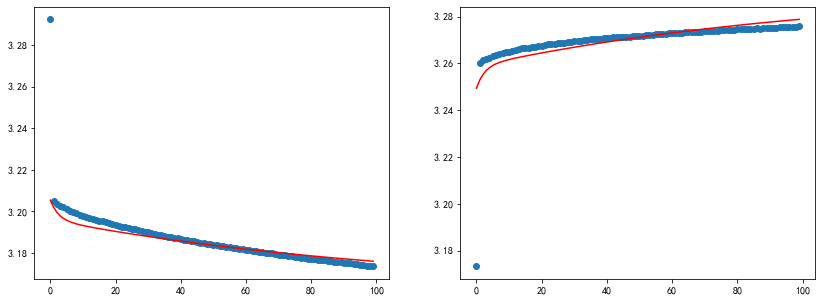

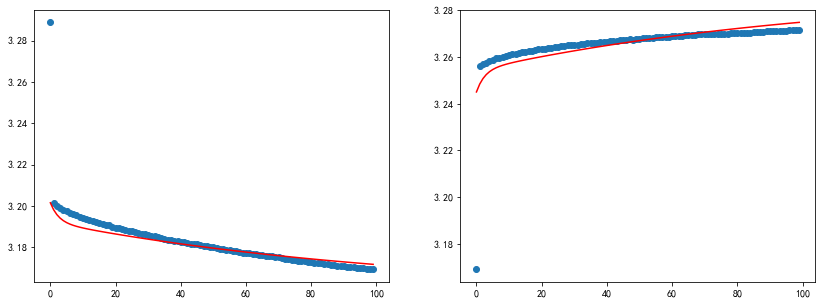

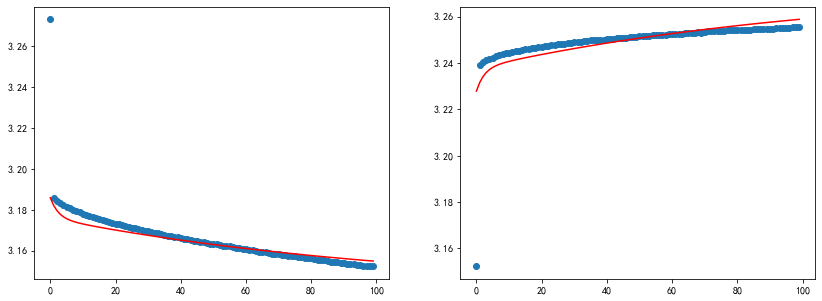

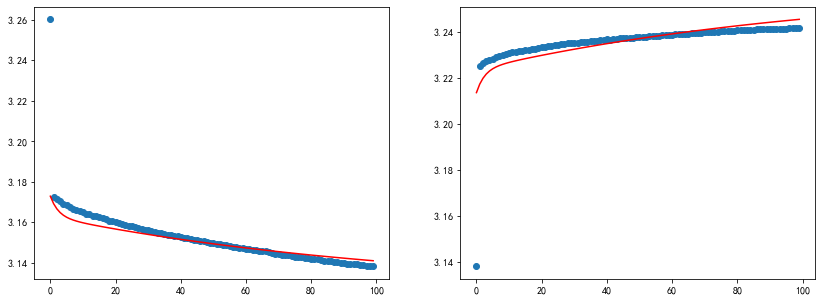

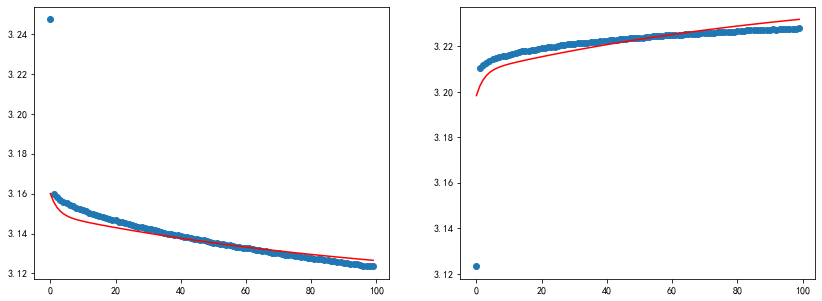

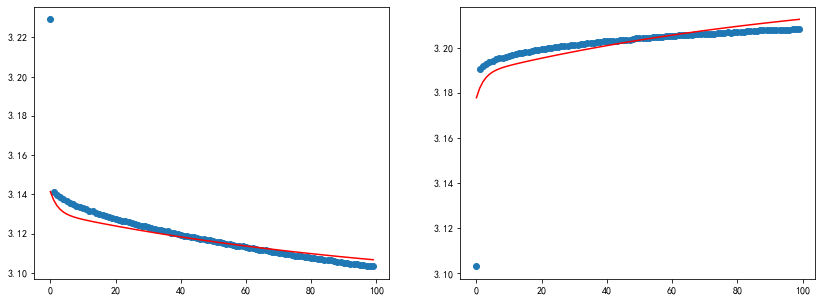

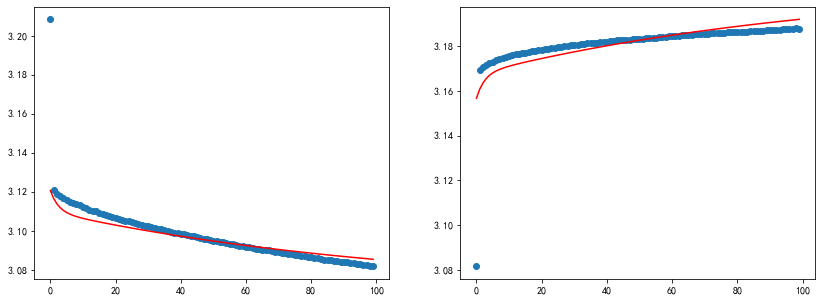

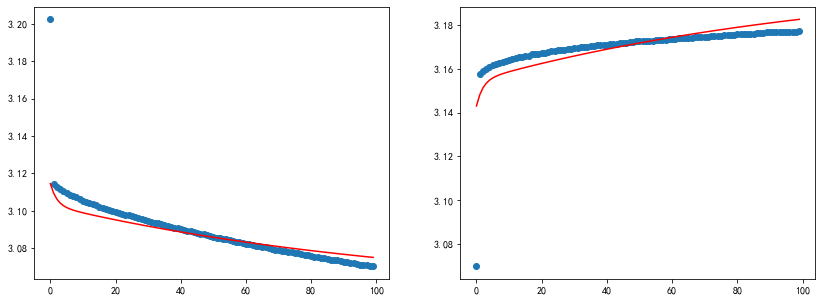

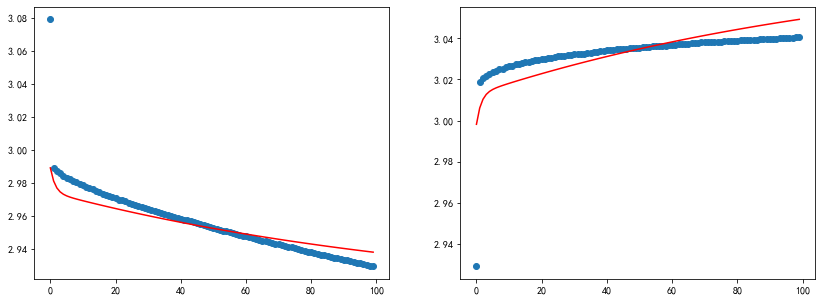

In [10]:
for i in range(19):
    ind = index[i]
    df1 = df[ind:int(ind+100)]
    df2 = df[int(ind+100):int(ind+200)]
    U1 = df1['电压(V)'].values[0]
    U2 = df1['电压(V)'].values[1]
    U3 = df2['电压(V)'].values[0]
    U4 = df2['电压(V)'].values[1]
    R0 = ((U1 - U2)+(U4 - U3))/2/100
    V1 = df1['电压(V)'].values
    V2 = df2['电压(V)'].values[0:100]
    X_data = []
    for j in range(len(V1)):
        X_data.append(j)
    
    U = U0[i+1]
    para_fit = Para_id(Uoc = U, I = 100, R0 = R0)
    params = para_fit.create_params()
    t = np.array(X_data)
    out = para_fit.fit(params, t, V1, V2)
    para_fit.fit_plot(out, X_data, V1, V2)
    
    results['R0'].append(R0)
    results['R1'].append(out.params['R1'].value)
    results['R2'].append(out.params['R2'].value)
    results['C1'].append(out.params['tao1'].value/out.params['R1'].value)
    results['C2'].append(out.params['tao2'].value/out.params['R2'].value)

In [11]:
Results = pd.DataFrame(results, index=[round(1-0.05*x, 2) for x in range(20)])

In [12]:
Results

,R0,R1,R2,C1,C2
1.00,0.000862,0.000511,0.000145,274651.997669,11710.489247
0.95,0.000858,0.000313,0.000092,343633.281340,29739.371411
0.90,0.000861,0.000328,0.000093,324282.038401,28736.340916
0.85,0.000863,0.000347,0.000098,310296.633210,25840.850581
0.80,0.000865,0.000374,0.000102,299889.617659,23031.024864
0.75,0.000865,0.000323,0.000095,345062.825798,29071.506604
0.70,0.000864,0.000312,0.000093,349435.078568,28278.616501
0.65,0.000866,0.000310,0.000090,346218.037103,29136.433636
0.60,0.000866,0.000314,0.000090,341768.715775,28107.544479
0.55,0.000869,0.000319,0.000090,340275.875246,29503.042645
